In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!unzip "AMIGOS.zip"

Archive:  AMIGOS.zip
  inflating: AMIGOS/Data_Preprocessed_P01.mat  
  inflating: AMIGOS/Data_Preprocessed_P02.mat  
  inflating: AMIGOS/Data_Preprocessed_P03.mat  
  inflating: AMIGOS/Data_Preprocessed_P04.mat  
  inflating: AMIGOS/Data_Preprocessed_P05.mat  
  inflating: AMIGOS/Data_Preprocessed_P06.mat  
  inflating: AMIGOS/Data_Preprocessed_P07.mat  
  inflating: AMIGOS/Data_Preprocessed_P08.mat  
  inflating: AMIGOS/Data_Preprocessed_P09.mat  
  inflating: AMIGOS/Data_Preprocessed_P10.mat  
  inflating: AMIGOS/Data_Preprocessed_P11.mat  
  inflating: AMIGOS/Data_Preprocessed_P12.mat  
  inflating: AMIGOS/Data_Preprocessed_P13.mat  
  inflating: AMIGOS/Data_Preprocessed_P14.mat  
  inflating: AMIGOS/Data_Preprocessed_P15.mat  
  inflating: AMIGOS/Data_Preprocessed_P16.mat  
  inflating: AMIGOS/Data_Preprocessed_P17.mat  
  inflating: AMIGOS/Data_Preprocessed_P18.mat  
  inflating: AMIGOS/Data_Preprocessed_P19.mat  
  inflating: AMIGOS/Data_Preprocessed_P20.mat  
  inflating: AMIGOS

In [13]:
import scipy.io
data = scipy.io.loadmat("AMIGOS/Data_Preprocessed_P32.mat")

In [26]:
#data['joined_data'][0][19].shape
#data['labels_selfassessment'][0][15].shape
#data['joined_data'].shape[1]
#data['labels_selfassessment'][0][1][0].shape

(1, 12)

(10191,)

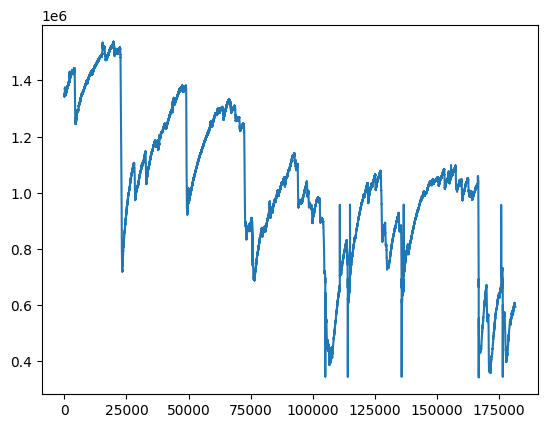

In [42]:
import matplotlib.pyplot as plt
plt.plot(data['joined_data'][0][16][384:,16])
data['joined_data'][0][3][384:,16].shape

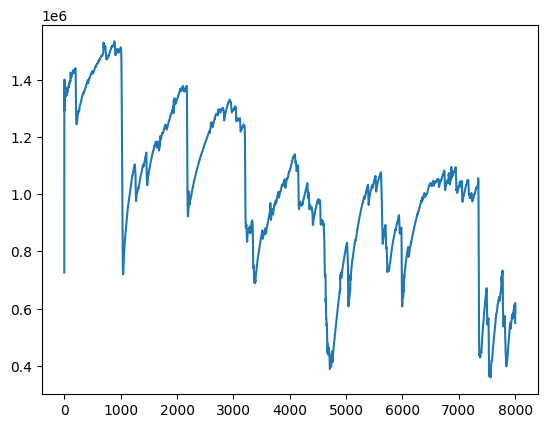

In [43]:
import scipy.io
y1 = scipy.signal.resample(data['joined_data'][0][16][:,16], 8000)
plt.plot(y1)


In [1]:
import glob
import os
filelist = glob.glob('AMIGOS/*.mat')
print(filelist)
subjectnames = [fr[25:28] for fr in filelist]
print(subjectnames)

['AMIGOS/Data_Preprocessed_P33.mat', 'AMIGOS/Data_Preprocessed_P30.mat', 'AMIGOS/Data_Preprocessed_P13.mat', 'AMIGOS/Data_Preprocessed_P26.mat', 'AMIGOS/Data_Preprocessed_P37.mat', 'AMIGOS/Data_Preprocessed_P31.mat', 'AMIGOS/Data_Preprocessed_P10.mat', 'AMIGOS/Data_Preprocessed_P09.mat', 'AMIGOS/Data_Preprocessed_P05.mat', 'AMIGOS/Data_Preprocessed_P40.mat', 'AMIGOS/Data_Preprocessed_P35.mat', 'AMIGOS/Data_Preprocessed_P32.mat', 'AMIGOS/Data_Preprocessed_P22.mat', 'AMIGOS/Data_Preprocessed_P23.mat', 'AMIGOS/Data_Preprocessed_P17.mat', 'AMIGOS/Data_Preprocessed_P04.mat', 'AMIGOS/Data_Preprocessed_P12.mat', 'AMIGOS/Data_Preprocessed_P34.mat', 'AMIGOS/Data_Preprocessed_P29.mat', 'AMIGOS/Data_Preprocessed_P15.mat', 'AMIGOS/Data_Preprocessed_P02.mat', 'AMIGOS/Data_Preprocessed_P25.mat', 'AMIGOS/Data_Preprocessed_P18.mat', 'AMIGOS/Data_Preprocessed_P36.mat', 'AMIGOS/Data_Preprocessed_P16.mat', 'AMIGOS/Data_Preprocessed_P28.mat', 'AMIGOS/Data_Preprocessed_P03.mat', 'AMIGOS/Data_Preprocessed_P

In [2]:
import scipy.io
import numpy as np
data_am = {}
skiplist = ['P28','P08','P24','P32']
newsubjectname = []
for sname in subjectnames:
    if sname in skiplist:
      continue
    newsubjectname.append(sname)
    dname = "AMIGOS/Data_Preprocessed_"+sname+".mat"
    x = scipy.io.loadmat(dname)
    print(sname)
    samples = []
    samples_labels = []
    for i in range(x['joined_data'].shape[1]):
        x1 = x['joined_data'][0][i]
        x2 = scipy.signal.resample(x1[384:,16], 8064)
        y1 = x['labels_selfassessment'][0][i][0][0:2]
        samples.append(x2)
        samples_labels.append(y1)
    samples_stack = np.vstack(samples)
    samples_labels_stack = np.vstack(samples_labels)
    data_am[sname] = [samples_stack,samples_labels_stack]

print(data_am.keys())

P33
P30
P13
P26
P37
P31
P10
P09
P05
P40
P35
P22
P23
P17
P04
P12
P34
P29
P15
P02
P25
P18
P36
P16
P03
P38
P39
P27
P01
P19
P06
P11
P21
P07
P14
P20
dict_keys(['P33', 'P30', 'P13', 'P26', 'P37', 'P31', 'P10', 'P09', 'P05', 'P40', 'P35', 'P22', 'P23', 'P17', 'P04', 'P12', 'P34', 'P29', 'P15', 'P02', 'P25', 'P18', 'P36', 'P16', 'P03', 'P38', 'P39', 'P27', 'P01', 'P19', 'P06', 'P11', 'P21', 'P07', 'P14', 'P20'])


In [8]:
data_am['P01'][0]

array([3237180.31474926, 3110649.65303398, 3179062.7496687 , ...,
       3514282.08715568, 3478618.13315719, 3540966.49534216])

In [4]:
import numpy as np
import matplotlib.pyplot as plt
data_cam = {}
for k,v in data_am.items():
    y = v[0]
    ym = np.mean(y,axis=-1).reshape(20,1)
    ystd = np.std(y,axis=-1).reshape(20,1)
    z = (y-ym)/ystd
    #print(z.shape)
    data_cam[k] = [z,v[1]]

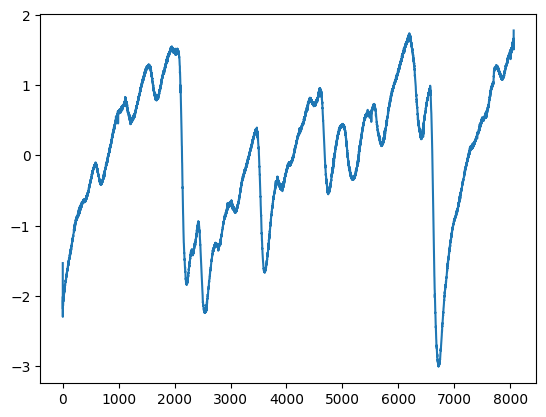

In [5]:
plt.plot(data_cam['P01'][0][0])

In [6]:
import torch
data_c1d = {}
BLOCK_SIZE=640
BLOCK_STRIDE=60
for k,v in data_cam.items():
    datablocki = []
    v1 = v[0]
    v1 = v1[:,np.newaxis,:]
    #print(v1.shape)
    data_c1d[k] = torch.tensor(v1)
print(data_c1d['P01'][0].shape)

torch.Size([1, 8064])


In [7]:
data_c2 = {}
for k,v in data_cam.items():
    y = v[1]
    x_label = np.zeros((y.shape[0]),dtype='float64')
    for i in range(y.shape[0]):
        if (y[i][0] > 5):
            x_label[i] = 1
        else:
            x_label[i] = 0

    x_l = x_label
    x_l = x_l.reshape(-1,1)
    x_l = torch.tensor(x_l)
    data_c2[k] = x_l

In [24]:
data_c2['P02']

tensor([[1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.],
        [0.],
        [1.]], dtype=torch.float64)

In [7]:
data_c2 = {}
maxnum = 3
for k,v in data_cam.items():
    y = v[1]
    x_label = np.zeros((y.shape[0]),dtype='int32')
    for i in range(y.shape[0]):
        if (y[i][1] > 5 and y[i][0] > 5):
            x_label[i] = 3
        elif (y[i][1] <= 5 and y[i][0] > 5):
            x_label[i] = 2
        elif (y[i][1] > 5 and y[i][0] <= 5):
            x_label[i] = 1
        elif (y[i][1] <= 5 and y[i][0] <= 5):
            x_label[i] = 0

    x_l = np.zeros((x_label.size, maxnum+1))
    x_l[np.arange(x_label.size), x_label] = 1

    x_l = torch.tensor(x_l)
    data_c2[k] = x_l

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
#from torchinfo import Summary
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.c1=nn.Conv1d(1, 34, 10,stride=1)
        self.mp1=nn.MaxPool1d(2)
        self.norm1 = nn.BatchNorm1d(34)
        self.d = nn.Dropout(p=0.63)
        self.c2=nn.Conv1d(34, 30, 10,stride=1)
        self.mp2=nn.MaxPool1d(2)
        self.c3=nn.Conv1d(30, 10, 10,stride=1)
        self.norm3 = nn.BatchNorm1d(10)
        self.mp3=nn.MaxPool1d(2)
        self.ft = nn.Flatten()

        self.n1 = nn.Linear(20070,110)
        #self.n1 = nn.Linear(19590,110)
        self.normfc1=nn.BatchNorm1d(110)
        self.d = nn.Dropout(p=0.63)
        #self.d = nn.Dropout()
        self.n2 = nn.Linear(110,100)
        self.n3 = nn.Linear(100,1)


    def forward(self, x):
        x = self.d(self.norm1(F.tanh(self.c1(x))))
        #x=F.tanh(self.c1(x))
        x = self.mp2(F.tanh(self.c2(x)))
        #print(x.shape)
        x = self.mp3(F.tanh(self.c3(x)))

        #print(x.shape)
        x = self.ft(x)
        #print(x.shape)
        x = F.tanh(self.n1(x))
        x=self.normfc1(x)
        #x=self.norm3(x)
        x=self.d(x)

        #x = F.softmax(self.n2(x),dim=-1)
        x = F.tanh(self.n2(x))
        x = F.sigmoid(self.n3(x))

        #x = (self.n3(x))
        #print(x.shape)
        return x


#criterion = nn.CrossEntropyLoss()
criterion = nn.BCELoss()



In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
file_list_num = np.arange(len(newsubjectname))
kf = KFold(n_splits=12)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
modellist = []
modelid = 1
#file_list_num
#for i, (train_index, test_index) in enumerate(kf.split(file_list_num)):
#for train_index in file_list_num:
train_index = file_list_num
print(f"Fold {i}:")
print(f"  Train: index={train_index}")
#print(f"  Test:  index={test_index}")
net = Net()
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.000001)
epochs = 60
batch_sz = 20
train_loss_epoch = []
val_loss_epoch = []
for epoch in range(epochs):
  train_loss = []
  for tr in train_index:
    v = data_c1d[newsubjectname[tr]]
    l = data_c2[newsubjectname[tr]]
    #print(v[0].shape)
    net.train()
    for i in range(0,len(v),batch_sz):
      #print(v[i].shape)
      #for j in range(0,v[i].shape[0],batch_sz):
      #print(newsubjectname[tr])
      optimizer.zero_grad()
      outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
      #print("Expout {}",outputs.shape)
      #print("Actual {}",l[i:i+batch_sz].shape)
      #print(l[i].shape)
      loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
      loss.backward()
      train_loss.append(loss)
      optimizer.step()
  print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {loss.item()}')
  train_loss_epoch.append(torch.stack(train_loss).mean().cpu().detach().numpy())

  '''
  for tr in test_index:
      net.eval()
      v = data_c1d[newsubjectname[tr]]
      l = data_c2[newsubjectname[tr]]
      net.eval()
      with torch.no_grad():
          for i in range(0,len(v),batch_sz):
            #print(v[i].shape)
            #for j in range(0,v[i].shape[0],batch_sz):
            optimizer.zero_grad()
            outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
            #print(outputs.shape)
            #print(l[i].shape)
            #outputs1 = torch.softmax(outputs,dim=-1)
            loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
            val_loss.append(loss)
            #loss.backward()
            actualoutput.append(torch.round(outputs.cpu()))
            expectedoutput.append(l[i:i+batch_sz])
            #actualoutput.append(torch.argmax(torch.softmax(outputs.cpu(),dim=1),dim=1))
            #expectedoutput.append(torch.argmax(l[i:i+batch_sz],dim=1).numpy())
  val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
  val_loss_epoch.append(val_loss_mean)
  expectedoutput = np.concatenate( expectedoutput, axis=0 )
  actualoutput = np.concatenate( actualoutput, axis=0 )
  print(expectedoutput.shape)
  print(actualoutput.shape)
  print(classification_report(expectedoutput,actualoutput))
  print(confusion_matrix(expectedoutput,actualoutput))
  print(f'Validation Loss for {subjectnames[tr]} = {val_loss_mean}')
  #break
  '''
#plt.figure(figsize=(10,7))
#print(len(train_loss_epoch))
#plt.plot(np.arange(epochs),train_loss_epoch,label='Train')
#plt.plot(np.arange(epochs),val_loss_epoch,label='Validation')
#plt.legend()
#path = "Model"+str(modelid) +".pt"
#path = "ModelAMIGOS_Aro.pt"
#modelid = modelid+1
#print(path)
#torch.save(net.state_dict(), path)

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


/tmp/ipykernel_203/3472248682.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 1/60, Train Loss: 0.6609741449356079
Epoch 2/60, Train Loss: 0.6968510746955872
Epoch 3/60, Train Loss: 0.7063091397285461
Epoch 4/60, Train Loss: 0.7129724025726318
Epoch 5/60, Train Loss: 0.6755002737045288
Epoch 6/60, Train Loss: 0.677463948726654
Epoch 7/60, Train Loss: 0.7001715302467346
Epoch 8/60, Train Loss: 0.641160249710083
Epoch 9/60, Train Loss: 0.6524507403373718
Epoch 10/60, Train Loss: 0.6981868147850037
Epoch 11/60, Train Loss: 0.7125951051712036
Epoch 12/60, Train Loss: 0.6761418581008911
Epoch 13/60, Train Loss: 0.6650707125663757
Epoch 14/60, Train Loss: 0.6498364806175232
Epoch 15/60, Train Loss: 0.6750850081443787
Epoch 16/60, Train Loss: 0.7362504005432129
Epoch 17/60, Train Loss: 0.6782377362251282
Epoch 18/60, Train Loss: 0.6005708575248718
Epoch 19/60, Train Loss: 0.6484631896018982
Epoch 20/60, Train Loss: 0.6615355610847473
Epoch 21/60, Train Loss: 0.7476146817207336
Epoch 22/60, Train Loss: 0.6450007557868958
Epoch 23/60, Train Loss: 0.6990272998809814

In [27]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
batch_sz = 20
file_list_num = np.arange(len(subjectnames))
modelid = 1
netValence = Net()
valmodelname = "Valence_Model4"+".pt"
netValence.load_state_dict(torch.load(valmodelname))
netValence.to(device)
netArousal = Net()
aromodelname = "Model5"+".pt"
netArousal.load_state_dict(torch.load(aromodelname))
netArousal.to(device)
for i in range(0,32,4):

    #optimizer = optim.Adam(net.parameters(), lr=0.000001)
    expectedoutput = []
    actualoutput = []
    for tr in file_list_num[i:i+4]:
        #net.eval()
        v = data_c1d[subjectnames[tr]]
        l = data_c3[subjectnames[tr]]
        netValence.eval()
        netArousal.eval()
        with torch.no_grad():
            for i in range(0,len(v),batch_sz):
              #print(v[i].shape)
              #for j in range(0,v[i].shape[0],batch_sz):
              #optimizer.zero_grad()
              outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
              outputs_val1 = torch.round(outputs_val)
              outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
              outputs_aro1 = torch.round(outputs_aro)

              #print(outputs_val1)
              for j in range(0,outputs_aro1.shape[0]):
                res = 0
                if (outputs_val1[j][0] >= 1 and outputs_aro1[j][0] >= 1):
                    res = 4
                elif (outputs_val1[j][0] < 1 and outputs_aro1[j][0] >= 1):
                    res = 3
                elif (outputs_val1[j][0] >= 1 and outputs_aro1[j][0] < 1):
                    res = 2
                elif (outputs_val1[j][0] < 1 and outputs_aro1[j][0] < 1):
                    res = 1
                actualoutput.append(res)
              #loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
              #val_loss.append(loss)
              #loss.backward()
              #print(outputs.shape)
              #print(l[i:i+batch_sz])
              expectedoutput.append(l[i:i+batch_sz])
              #actualoutput.append(actualoutput)
      #val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
      #val_loss_epoch.append(val_loss_mean)
    expectedoutput = np.concatenate( expectedoutput, axis=0 )
      #actualoutput = np.concatenate( actualoutput, axis=0 )
      #print(actualoutput)
    #print(expectedoutput)
    #print(actualoutput)
    print(classification_report(expectedoutput,actualoutput))
      #print(f'Validation Loss for {subjectnames[tr]} = {val_loss_mean}')
      #break

<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.39      0.22      0.28        41
           2       0.56      0.12      0.20        42
           3       0.24      0.52      0.33        27
           4       0.36      0.50      0.42        50

    accuracy                           0.33       160
   macro avg       0.39      0.34      0.31       160
weighted avg       0.40      0.33      0.31       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.50      0.17      0.25        42
           2       1.00      0.10      0.18        30
           3       0.34      0.83      0.48        41
           4       0.40      0.36      0.38        47

    accuracy                           0.38       160
   macro avg       0.56      0.36      0.32       160
weighted avg       0.52      0.38      0.33       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.21      0.19      0.20        31
           2       0.57      0.12      0.20        34
           3       0.29      0.53      0.37        43
           4       0.48      0.40      0.44        52

    accuracy                           0.34       160
   macro avg       0.39      0.31      0.30       160
weighted avg       0.39      0.34      0.32       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.36      0.12      0.19        32
           2       0.67      0.05      0.10        39
           3       0.30      0.67      0.42        39
           4       0.52      0.62      0.56        50

    accuracy                           0.39       160
   macro avg       0.46      0.37      0.32       160
weighted avg       0.47      0.39      0.34       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.44      0.10      0.16        42
           2       0.33      0.07      0.12        28
           3       0.21      0.77      0.33        26
           4       0.48      0.36      0.41        64

    accuracy                           0.31       160
   macro avg       0.37      0.32      0.25       160
weighted avg       0.40      0.31      0.28       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

           1       0.56      0.18      0.27        28
           2       0.00      0.00      0.00        22
           3       0.31      0.71      0.43        48
           4       0.55      0.35      0.43        62

    accuracy                           0.38       160
   macro avg       0.35      0.31      0.28       160
weighted avg       0.40      0.38      0.34       160



<ipython-input-27-7929d1561c85>:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_val = netValence(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
<ipython-input-27-7929d1561c85>:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs_aro = netArousal(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/

              precision    recall  f1-score   support

           1       0.17      0.03      0.05        33
           2       0.00      0.00      0.00        37
           3       0.27      0.76      0.39        41
           4       0.37      0.29      0.32        49

    accuracy                           0.29       160
   macro avg       0.20      0.27      0.19       160
weighted avg       0.22      0.29      0.21       160

              precision    recall  f1-score   support

           1       0.26      0.20      0.23        25
           2       1.00      0.14      0.24        37
           3       0.20      0.55      0.29        33
           4       0.50      0.34      0.40        65

    accuracy                           0.31       160
   macro avg       0.49      0.30      0.29       160
weighted avg       0.52      0.31      0.31       160



In [ ]:
rm -rf Model*.pt

In [28]:
data_c3 = {}
for k,v in data_c.items():
    y = data_c[k][1]
    x_label = np.zeros((y.shape[0]),dtype='int8')
    for i in range(y.shape[0]):
        if (y[i][0] > 5 and y[i][1] > 5):
            x_label[i] = 4
        elif (y[i][0] <= 5 and y[i][1] > 5):
            x_label[i] = 3
        elif (y[i][0] > 5 and y[i][1] <= 5):
            x_label[i] = 2
        elif (y[i][0] <= 5 and y[i][1] <= 5):
            x_label[i] = 1
    #x_l = np.zeros((x_label.size, x_label.max()+1))
    #x_l[np.arange(x_label.size), x_label] = 1
    #
    #print(x_l.shape)
    #x_l = x_l.reshape(-1,1,4)
    #x_l = np.repeat(x_l, 117, axis=1)
    #print(x_l.shape)
    x_l = torch.tensor(x_label)
    data_c3[k] = x_l
    #print(data_c3)

In [9]:
import glob
import os
filelistd = glob.glob('DEAP/*.dat')
print(filelistd)
subjectnamesd = [fr[5:8] for fr in filelistd]
print(subjectnamesd)

['DEAP/s21.dat', 'DEAP/s25.dat', 'DEAP/s07.dat', 'DEAP/s22.dat', 'DEAP/s32.dat', 'DEAP/s10.dat', 'DEAP/s04.dat', 'DEAP/s23.dat', 'DEAP/s30.dat', 'DEAP/s06.dat', 'DEAP/s31.dat', 'DEAP/s16.dat', 'DEAP/s15.dat', 'DEAP/s08.dat', 'DEAP/s28.dat', 'DEAP/s17.dat', 'DEAP/s26.dat', 'DEAP/s02.dat', 'DEAP/s19.dat', 'DEAP/s18.dat', 'DEAP/s03.dat', 'DEAP/s29.dat', 'DEAP/s24.dat', 'DEAP/s05.dat', 'DEAP/s14.dat', 'DEAP/s12.dat', 'DEAP/s11.dat', 'DEAP/s27.dat', 'DEAP/s20.dat', 'DEAP/s09.dat', 'DEAP/s13.dat', 'DEAP/s01.dat']
['s21', 's25', 's07', 's22', 's32', 's10', 's04', 's23', 's30', 's06', 's31', 's16', 's15', 's08', 's28', 's17', 's26', 's02', 's19', 's18', 's03', 's29', 's24', 's05', 's14', 's12', 's11', 's27', 's20', 's09', 's13', 's01']


In [10]:
import pickle
datad = {}
for sname in subjectnamesd:
    dname = "DEAP/"+sname+".dat"
    f = open(dname, 'rb')
    x = pickle.load(f, encoding='latin1')
    datad[sname] = x
print(datad.keys())

dict_keys(['s21', 's25', 's07', 's22', 's32', 's10', 's04', 's23', 's30', 's06', 's31', 's16', 's15', 's08', 's28', 's17', 's26', 's02', 's19', 's18', 's03', 's29', 's24', 's05', 's14', 's12', 's11', 's27', 's20', 's09', 's13', 's01'])


In [11]:
import numpy as np
data_de = {}
for k,v in datad.items():
    y = datad[k]['data'][:,36,:]
    ym = np.mean(y,axis=-1).reshape(40,1)
    ystd = np.std(y,axis=-1).reshape(40,1)
    z = (y-ym)/ystd
    data_de[k] = [z,datad[k]['labels']]

In [12]:
import torch
data_de1 = {}
for k,v in data_de.items():
    datablocki = []
    v1=np.vstack(v[0])
    v1 = v1[:,np.newaxis,:]
    data_de1[k] = torch.tensor(v1)
print(data_de1['s01'][0].shape)

torch.Size([1, 8064])


In [13]:
data_del = {}
for k,v in data_de.items():
    y = data_de[k][1]
    x_label = np.zeros((y.shape[0]),dtype='float64')
    for i in range(y.shape[0]):
        if (y[i][1] > 5):
            x_label[i] = 1
        else:
            x_label[i] = 0

    #x_l = np.zeros((x_label.size, x_label.max()+1))
    #x_l[np.arange(x_label.size), x_label] = 1
    x_l = x_label
    #
    #print(x_l.shape)
    x_l = x_l.reshape(-1,1)

    x_l = torch.tensor(x_l)
    data_del[k] = x_l

In [14]:
data_del['s01'].shape

torch.Size([40, 1])

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
file_list_numd = np.arange(len(subjectnamesd))
net = Net()
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.000001)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
expectedoutputdeap = []
actualoutputdeap = []
val_loss = []
expectedoutput = []
actualoutput = []
test_index = file_list_numd
print(f"Fold {i}:")
print(f"  Train: index={test_index}")
#print(f"  Test:  index={test_index}")
#net = Net()
#net.to(device)
#optimizer = optim.Adam(net.parameters(), lr=0.000001)
#epochs = 60
batch_sz = 20
train_loss_epoch = []
val_loss_epoch = []

for tr in test_index:
    net.eval()
    v = data_de1[subjectnamesd[tr]]
    l = data_del[subjectnamesd[tr]]
    net.eval()
    with torch.no_grad():
        for i in range(0,len(v),batch_sz):
          #print(v[i].shape)
          #for j in range(0,v[i].shape[0],batch_sz):
          optimizer.zero_grad()
          outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
          #print(outputs.shape)
          #print(l[i:i+batch_sz].shape)
          loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
          val_loss.append(loss)
          actualoutputdeap.append(torch.round(outputs.cpu()))
          expectedoutputdeap.append(l[i:i+batch_sz])
          #actualoutput.append(torch.argmax(torch.softmax(outputs.cpu(),dim=1),dim=1))
          #expectedoutput.append(torch.argmax(l[i:i+batch_sz],dim=1).numpy())
val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
val_loss_epoch.append(val_loss_mean)
expectedoutputdeap = np.concatenate( expectedoutputdeap, axis=0 )
actualoutputdeap = np.concatenate( actualoutputdeap, axis=0 )
#print(expectedoutput.shape)
#print(actualoutput.shape)
print(classification_report(expectedoutputdeap,actualoutputdeap))
print(confusion_matrix(expectedoutputdeap,actualoutputdeap))
print(f'Validation Loss for {subjectnamesd[tr]} = {val_loss_mean}')
#break

#plt.figure(figsize=(10,7))
#print(len(train_loss_epoch))
#plt.plot(np.arange(epochs),train_loss_epoch,label='Train')
#plt.plot(np.arange(epochs),val_loss_epoch,label='Validation')
#plt.legend()
#path = "Model"+str(modelid) +".pt"
#path = "ModelAMIGOS_Aro.pt"
#modelid = modelid+1
#print(path)
#torch.save(net.state_dict(), path)

Fold 20:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


/tmp/ipykernel_410/3061022090.py:39: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


              precision    recall  f1-score   support

         0.0       0.45      1.00      0.62       572
         1.0       0.00      0.00      0.00       708

    accuracy                           0.45      1280
   macro avg       0.22      0.50      0.31      1280
weighted avg       0.20      0.45      0.28      1280

[[572   0]
 [708   0]]
Validation Loss for s01 = 0.6970333456993103


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Fold 39:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]
  Test:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 1/100, Train Loss: 0.6254265904426575
              precision    recall  f1-score   support

         0.0       0.43      0.81      0.56       543
         1.0       0.61      0.22      0.32       737

    accuracy                           0.47      1280
   macro avg       0.52      0.51      0.44      1280
weighted avg       0.53      0.47      0.42      1280

[[438 105]
 [576 161]]
Validation Loss for s01 = 0.6921438574790955


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 2/100, Train Loss: 0.6329383254051208
              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[417 126]
 [553 184]]
Validation Loss for s01 = 0.6993991732597351


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 3/100, Train Loss: 0.6513366103172302
              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.24      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[417 126]
 [557 180]]
Validation Loss for s01 = 0.7214118242263794


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 4/100, Train Loss: 0.6435428857803345


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.52      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[420 123]
 [553 184]]
Validation Loss for s01 = 0.7300715446472168


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 5/100, Train Loss: 0.7167419791221619


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.78      0.56       543
         1.0       0.61      0.26      0.36       737

    accuracy                           0.48      1280
   macro avg       0.52      0.52      0.46      1280
weighted avg       0.53      0.48      0.44      1280

[[422 121]
 [549 188]]
Validation Loss for s01 = 0.7386218309402466


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 6/100, Train Loss: 0.6830275058746338
              precision    recall  f1-score   support

         0.0       0.43      0.78      0.56       543
         1.0       0.61      0.26      0.36       737

    accuracy                           0.48      1280
   macro avg       0.52      0.52      0.46      1280
weighted avg       0.53      0.48      0.44      1280

[[421 122]
 [548 189]]
Validation Loss for s01 = 0.7441049814224243


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 7/100, Train Loss: 0.6668974757194519
              precision    recall  f1-score   support

         0.0       0.43      0.78      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.52      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[421 122]
 [554 183]]
Validation Loss for s01 = 0.7543298602104187


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 8/100, Train Loss: 0.7026538848876953


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[418 125]
 [551 186]]
Validation Loss for s01 = 0.7541047930717468


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 9/100, Train Loss: 0.695386528968811


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.60      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.46      1280
weighted avg       0.53      0.47      0.44      1280

[[414 129]
 [547 190]]
Validation Loss for s01 = 0.7543724775314331


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 10/100, Train Loss: 0.657189667224884


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.60      0.27      0.37       737

    accuracy                           0.48      1280
   macro avg       0.52      0.51      0.46      1280
weighted avg       0.53      0.48      0.45      1280

[[414 129]
 [541 196]]
Validation Loss for s01 = 0.7524122595787048


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 11/100, Train Loss: 0.6590602993965149


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.36       737

    accuracy                           0.47      1280
   macro avg       0.52      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[418 125]
 [550 187]]
Validation Loss for s01 = 0.7537333369255066


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 12/100, Train Loss: 0.6205658316612244


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[419 124]
 [554 183]]
Validation Loss for s01 = 0.7596138119697571


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 13/100, Train Loss: 0.6226426362991333


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[419 124]
 [554 183]]
Validation Loss for s01 = 0.7676873207092285


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 14/100, Train Loss: 0.6550549864768982


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[414 129]
 [553 184]]
Validation Loss for s01 = 0.7621177434921265


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 15/100, Train Loss: 0.6586475372314453
              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[413 130]
 [551 186]]
Validation Loss for s01 = 0.7615396976470947


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 16/100, Train Loss: 0.7287800312042236
              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280



/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


[[415 128]
 [552 185]]
Validation Loss for s01 = 0.7647521495819092


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 17/100, Train Loss: 0.717319667339325


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[412 131]
 [549 188]]
Validation Loss for s01 = 0.7604794502258301


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 18/100, Train Loss: 0.6887262463569641


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[414 129]
 [554 183]]
Validation Loss for s01 = 0.7643703818321228


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 19/100, Train Loss: 0.6445534229278564


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.50      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[414 129]
 [555 182]]
Validation Loss for s01 = 0.7652432918548584


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 20/100, Train Loss: 0.6778649091720581


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.50      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[415 128]
 [556 181]]
Validation Loss for s01 = 0.7608133554458618


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 21/100, Train Loss: 0.6467194557189941


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.58      0.24      0.34       737

    accuracy                           0.46      1280
   macro avg       0.51      0.50      0.45      1280
weighted avg       0.52      0.46      0.43      1280

[[415 128]
 [557 180]]
Validation Loss for s01 = 0.7602121829986572


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 22/100, Train Loss: 0.6175727248191833


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.58      0.24      0.34       737

    accuracy                           0.46      1280
   macro avg       0.50      0.50      0.45      1280
weighted avg       0.52      0.46      0.43      1280

[[415 128]
 [558 179]]
Validation Loss for s01 = 0.7634924054145813


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 23/100, Train Loss: 0.5991201400756836


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[415 128]
 [553 184]]
Validation Loss for s01 = 0.7609373927116394


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 24/100, Train Loss: 0.6131755709648132


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.50      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[415 128]
 [556 181]]
Validation Loss for s01 = 0.7622840404510498


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 25/100, Train Loss: 0.6244475245475769
              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[414 129]
 [552 185]]
Validation Loss for s01 = 0.765120804309845


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 26/100, Train Loss: 0.6138948798179626


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[415 128]
 [552 185]]
Validation Loss for s01 = 0.7671107053756714


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 27/100, Train Loss: 0.6788482666015625


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[416 127]
 [554 183]]
Validation Loss for s01 = 0.7701491117477417


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 28/100, Train Loss: 0.6385879516601562


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[417 126]
 [556 181]]
Validation Loss for s01 = 0.7646596431732178


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 29/100, Train Loss: 0.6283921599388123


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.78      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[421 122]
 [556 181]]
Validation Loss for s01 = 0.7669671773910522


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 30/100, Train Loss: 0.6315593123435974


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.78      0.55       543
         1.0       0.60      0.24      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.53      0.47      0.43      1280

[[421 122]
 [557 180]]
Validation Loss for s01 = 0.7701692581176758


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 31/100, Train Loss: 0.6281326413154602


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.53      0.47      0.43      1280

[[420 123]
 [556 181]]
Validation Loss for s01 = 0.770138144493103


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 32/100, Train Loss: 0.6363617777824402
              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[415 128]
 [552 185]]
Validation Loss for s01 = 0.7690116167068481


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 33/100, Train Loss: 0.647023618221283
              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.36       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[414 129]
 [550 187]]
Validation Loss for s01 = 0.7677376866340637


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 34/100, Train Loss: 0.6905393600463867
              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.24      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[418 125]
 [557 180]]
Validation Loss for s01 = 0.7778984308242798


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 35/100, Train Loss: 0.6917165517807007
              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[416 127]
 [551 186]]
Validation Loss for s01 = 0.7705255150794983


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 36/100, Train Loss: 0.623077392578125


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[419 124]
 [554 183]]
Validation Loss for s01 = 0.7742001414299011


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 37/100, Train Loss: 0.6943680644035339
              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[419 124]
 [556 181]]
Validation Loss for s01 = 0.7758888006210327


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 38/100, Train Loss: 0.6780388355255127


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.36       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[417 126]
 [550 187]]
Validation Loss for s01 = 0.7630783319473267


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 39/100, Train Loss: 0.697835385799408
              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[417 126]
 [551 186]]
Validation Loss for s01 = 0.7620947360992432


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 40/100, Train Loss: 0.719265878200531


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[418 125]
 [553 184]]
Validation Loss for s01 = 0.7653250694274902


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 41/100, Train Loss: 0.6484021544456482
              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[419 124]
 [556 181]]
Validation Loss for s01 = 0.7664178609848022


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 42/100, Train Loss: 0.7136654257774353


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[420 123]
 [555 182]]
Validation Loss for s01 = 0.7594252824783325


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 43/100, Train Loss: 0.6653256416320801


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.24      0.34       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[420 123]
 [558 179]]
Validation Loss for s01 = 0.7655988931655884


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 44/100, Train Loss: 0.6979792714118958


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[418 125]
 [553 184]]
Validation Loss for s01 = 0.7611653208732605


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 45/100, Train Loss: 0.6632940769195557


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.24      0.34       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[420 123]
 [558 179]]
Validation Loss for s01 = 0.768255352973938


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 46/100, Train Loss: 0.6281082034111023


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.52      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[419 124]
 [552 185]]
Validation Loss for s01 = 0.7585955858230591


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 47/100, Train Loss: 0.6755558848381042
              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280



/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


[[418 125]
 [556 181]]
Validation Loss for s01 = 0.7624230980873108


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 48/100, Train Loss: 0.6702927947044373
              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.24      0.34       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[420 123]
 [559 178]]
Validation Loss for s01 = 0.7656406164169312


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 49/100, Train Loss: 0.7109683156013489
              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.24      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[420 123]
 [557 180]]
Validation Loss for s01 = 0.7668026685714722


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 50/100, Train Loss: 0.7166356444358826


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.53      0.47      0.43      1280

[[420 123]
 [556 181]]
Validation Loss for s01 = 0.7716360688209534


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 51/100, Train Loss: 0.6864690184593201
              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.52      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[419 124]
 [552 185]]
Validation Loss for s01 = 0.767868161201477


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 52/100, Train Loss: 0.604030966758728


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.52      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[420 123]
 [553 184]]
Validation Loss for s01 = 0.7661932706832886


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 53/100, Train Loss: 0.6776286959648132
              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280



/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


[[415 128]
 [552 185]]
Validation Loss for s01 = 0.763084888458252


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 54/100, Train Loss: 0.6642383933067322


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[419 124]
 [556 181]]
Validation Loss for s01 = 0.7655931115150452


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 55/100, Train Loss: 0.6709189414978027


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[418 125]
 [556 181]]
Validation Loss for s01 = 0.7610743045806885


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 56/100, Train Loss: 0.6810974478721619


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[417 126]
 [553 184]]
Validation Loss for s01 = 0.7625638842582703


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 57/100, Train Loss: 0.6430944800376892


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[418 125]
 [553 184]]
Validation Loss for s01 = 0.7591494917869568


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 58/100, Train Loss: 0.6498996019363403


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[418 125]
 [556 181]]
Validation Loss for s01 = 0.7661039233207703


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 59/100, Train Loss: 0.6124952435493469


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[418 125]
 [556 181]]
Validation Loss for s01 = 0.7677444219589233


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 60/100, Train Loss: 0.6824191808700562
              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[417 126]
 [553 184]]
Validation Loss for s01 = 0.7617424726486206


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 61/100, Train Loss: 0.6873204112052917


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[416 127]
 [553 184]]
Validation Loss for s01 = 0.7594742774963379


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 62/100, Train Loss: 0.6278077363967896


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[417 126]
 [552 185]]
Validation Loss for s01 = 0.760638952255249


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 63/100, Train Loss: 0.669555127620697
              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.53      0.47      0.44      1280

[[417 126]
 [552 185]]
Validation Loss for s01 = 0.7658336758613586


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 64/100, Train Loss: 0.7174664735794067


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[414 129]
 [548 189]]
Validation Loss for s01 = 0.7611130475997925


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 65/100, Train Loss: 0.6608578562736511


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[413 130]
 [549 188]]
Validation Loss for s01 = 0.7558221817016602


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 66/100, Train Loss: 0.6499595642089844
              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.58      0.25      0.35       737

    accuracy                           0.46      1280
   macro avg       0.50      0.50      0.45      1280
weighted avg       0.52      0.46      0.43      1280

[[411 132]
 [553 184]]
Validation Loss for s01 = 0.7614157199859619


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 67/100, Train Loss: 0.6731989979743958


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.58      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.50      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[412 131]
 [553 184]]
Validation Loss for s01 = 0.7638481855392456


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 68/100, Train Loss: 0.6199194192886353


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.54       543
         1.0       0.58      0.25      0.35       737

    accuracy                           0.46      1280
   macro avg       0.50      0.50      0.45      1280
weighted avg       0.52      0.46      0.43      1280

[[410 133]
 [552 185]]
Validation Loss for s01 = 0.7581473588943481


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 69/100, Train Loss: 0.6981672048568726


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[413 130]
 [553 184]]
Validation Loss for s01 = 0.7604258060455322


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 70/100, Train Loss: 0.6335961818695068


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[410 133]
 [549 188]]
Validation Loss for s01 = 0.758737325668335


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 71/100, Train Loss: 0.7060639262199402


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.50      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[412 131]
 [552 185]]
Validation Loss for s01 = 0.7615333795547485


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 72/100, Train Loss: 0.6631054282188416


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.50      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[412 131]
 [552 185]]
Validation Loss for s01 = 0.761833906173706


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 73/100, Train Loss: 0.5906029343605042
              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[412 131]
 [550 187]]
Validation Loss for s01 = 0.7656362056732178


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 74/100, Train Loss: 0.645348846912384
              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[414 129]
 [552 185]]
Validation Loss for s01 = 0.7714424729347229


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 75/100, Train Loss: 0.7250844836235046


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[413 130]
 [549 188]]
Validation Loss for s01 = 0.763552725315094


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 76/100, Train Loss: 0.6575458645820618
              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[413 130]
 [551 186]]
Validation Loss for s01 = 0.7705312967300415


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 77/100, Train Loss: 0.6508354544639587


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.58      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.50      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[411 132]
 [551 186]]
Validation Loss for s01 = 0.7723766565322876


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 78/100, Train Loss: 0.6598929762840271


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[413 130]
 [550 187]]
Validation Loss for s01 = 0.7758009433746338


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 79/100, Train Loss: 0.6968404650688171


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[411 132]
 [550 187]]
Validation Loss for s01 = 0.771257758140564


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 80/100, Train Loss: 0.6161978244781494


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.58      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.50      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[410 133]
 [550 187]]
Validation Loss for s01 = 0.7696883678436279


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 81/100, Train Loss: 0.6271018385887146


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[412 131]
 [551 186]]
Validation Loss for s01 = 0.7701404094696045


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 82/100, Train Loss: 0.6605101823806763


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[411 132]
 [547 190]]
Validation Loss for s01 = 0.7654953598976135


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 83/100, Train Loss: 0.6180766224861145
              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[410 133]
 [546 191]]
Validation Loss for s01 = 0.7669090032577515


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 84/100, Train Loss: 0.6818034052848816
              precision    recall  f1-score   support

         0.0       0.43      0.75      0.54       543
         1.0       0.58      0.25      0.35       737

    accuracy                           0.46      1280
   macro avg       0.50      0.50      0.45      1280
weighted avg       0.51      0.46      0.43      1280

[[409 134]
 [553 184]]
Validation Loss for s01 = 0.7706606388092041


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 85/100, Train Loss: 0.6395217776298523


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.54       543
         1.0       0.58      0.25      0.35       737

    accuracy                           0.46      1280
   macro avg       0.50      0.50      0.45      1280
weighted avg       0.51      0.46      0.43      1280

[[410 133]
 [553 184]]
Validation Loss for s01 = 0.7718051671981812


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 86/100, Train Loss: 0.6926355957984924


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.58      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.50      0.50      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[410 133]
 [551 186]]
Validation Loss for s01 = 0.7661998867988586


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 87/100, Train Loss: 0.6293601393699646


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.75      0.54       543
         1.0       0.58      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.50      0.50      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[409 134]
 [550 187]]
Validation Loss for s01 = 0.7626380920410156


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 88/100, Train Loss: 0.6645578742027283
              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.58      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.50      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[411 132]
 [551 186]]
Validation Loss for s01 = 0.7693678140640259


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 89/100, Train Loss: 0.6724210977554321


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.45      1280
weighted avg       0.52      0.47      0.44      1280

[[410 133]
 [547 190]]
Validation Loss for s01 = 0.7670571208000183


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 90/100, Train Loss: 0.6520082354545593


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.25      0.35       737

    accuracy                           0.47      1280
   macro avg       0.51      0.50      0.45      1280
weighted avg       0.52      0.47      0.43      1280

[[412 131]
 [552 185]]
Validation Loss for s01 = 0.7682204842567444


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 91/100, Train Loss: 0.6696372628211975


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.60      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.46      1280
weighted avg       0.53      0.47      0.44      1280

[[413 130]
 [546 191]]
Validation Loss for s01 = 0.7632932066917419


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 92/100, Train Loss: 0.6607741713523865


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.59      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.46      1280
weighted avg       0.52      0.47      0.44      1280

[[411 132]
 [544 193]]
Validation Loss for s01 = 0.760953962802887


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 93/100, Train Loss: 0.5923132300376892


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.26      0.37       737

    accuracy                           0.48      1280
   macro avg       0.52      0.51      0.46      1280
weighted avg       0.53      0.48      0.45      1280

[[416 127]
 [544 193]]
Validation Loss for s01 = 0.7607110738754272


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 94/100, Train Loss: 0.673134982585907


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.52      0.51      0.46      1280
weighted avg       0.53      0.47      0.44      1280

[[419 124]
 [549 188]]
Validation Loss for s01 = 0.7647584676742554


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 95/100, Train Loss: 0.6088253259658813
              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.60      0.26      0.37       737

    accuracy                           0.47      1280
   macro avg       0.52      0.51      0.46      1280
weighted avg       0.53      0.47      0.44      1280

[[413 130]
 [543 194]]
Validation Loss for s01 = 0.7561044692993164


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 96/100, Train Loss: 0.6240304112434387


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.60      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.46      1280
weighted avg       0.53      0.47      0.44      1280

[[413 130]
 [544 193]]
Validation Loss for s01 = 0.7630923986434937


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 97/100, Train Loss: 0.7087463736534119
              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.60      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.46      1280
weighted avg       0.53      0.47      0.44      1280

[[414 129]
 [547 190]]
Validation Loss for s01 = 0.7608875036239624


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.f

Epoch 98/100, Train Loss: 0.6991190314292908


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.60      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.51      0.51      0.46      1280
weighted avg       0.53      0.47      0.44      1280

[[415 128]
 [547 190]]
Validation Loss for s01 = 0.7609009146690369


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 99/100, Train Loss: 0.6898341178894043


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.76      0.55       543
         1.0       0.60      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.52      0.51      0.46      1280
weighted avg       0.53      0.47      0.44      1280

[[415 128]
 [546 191]]
Validation Loss for s01 = 0.7577250003814697


/tmp/ipykernel_32/3575763110.py:40: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 100/100, Train Loss: 0.6842050552368164


/tmp/ipykernel_32/3575763110.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.43      0.77      0.55       543
         1.0       0.60      0.26      0.36       737

    accuracy                           0.47      1280
   macro avg       0.52      0.51      0.46      1280
weighted avg       0.53      0.47      0.44      1280

[[416 127]
 [547 190]]
Validation Loss for s01 = 0.7615162134170532


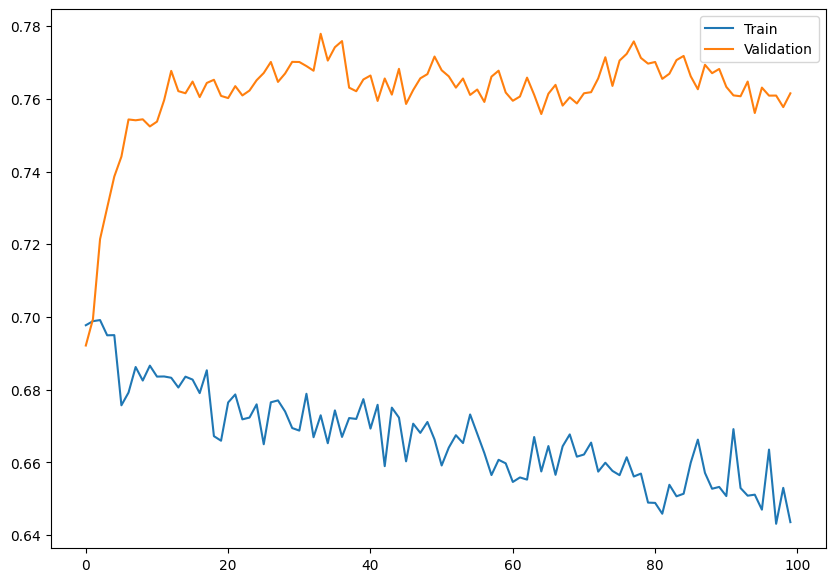

In [12]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
file_list_num = np.arange(len(newsubjectname))
file_list_numd = np.arange(len(subjectnamesd))
test_index = file_list_numd
kf = KFold(n_splits=12)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
modellist = []
modelid = 1
#file_list_num
#for i, (train_index, test_index) in enumerate(kf.split(file_list_num)):
#for train_index in file_list_num:
train_index = file_list_num
print(f"Fold {i}:")
print(f"  Train: index={train_index}")
print(f"  Test:  index={test_index}")
net = Net()
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.000001)
epochs = 100
batch_sz = 20
train_loss_epoch = []
val_loss_epoch = []
for epoch in range(epochs):
  train_loss = []
  for tr in train_index:
    v = data_c1d[newsubjectname[tr]]
    l = data_c2[newsubjectname[tr]]
    #print(v[0].shape)
    net.train()
    for i in range(0,len(v),batch_sz):
      #print(v[i].shape)
      #for j in range(0,v[i].shape[0],batch_sz):
      #print(newsubjectname[tr])
      optimizer.zero_grad()
      outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
      #print("Expout {}",outputs.shape)
      #print("Actual {}",l[i:i+batch_sz].shape)
      #print(l[i].shape)
      loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
      loss.backward()
      train_loss.append(loss)
      optimizer.step()
  print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {loss.item()}')
  train_loss_epoch.append(torch.stack(train_loss).mean().cpu().detach().numpy())
  #print(train_loss_epoch)
  batch_sz = 20
  expectedoutputdeap = []
  actualoutputdeap = []

  for tr in test_index:
      net.eval()
      v = data_de1[subjectnamesd[tr]]
      l = data_del[subjectnamesd[tr]]
      net.eval()
      val_loss = []
      with torch.no_grad():
          for i in range(0,len(v),batch_sz):
            #print(v[i].shape)
            #for j in range(0,v[i].shape[0],batch_sz):
            optimizer.zero_grad()
            outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
            #print(outputs.shape)
            #print(l[i:i+batch_sz].shape)
            loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
            val_loss.append(loss)
            actualoutputdeap.append(torch.round(outputs.cpu()))
            expectedoutputdeap.append(l[i:i+batch_sz])
            #actualoutput.append(torch.argmax(torch.softmax(outputs.cpu(),dim=1),dim=1))
            #expectedoutput.append(torch.argmax(l[i:i+batch_sz],dim=1).numpy())
  val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
  val_loss_epoch.append(val_loss_mean)
  expectedoutputdeap = np.concatenate( expectedoutputdeap, axis=0 )
  actualoutputdeap = np.concatenate( actualoutputdeap, axis=0 )
  #print(expectedoutput.shape)
  #print(actualoutput.shape)
  print(classification_report(expectedoutputdeap,actualoutputdeap))
  print(confusion_matrix(expectedoutputdeap,actualoutputdeap))
  print(f'Validation Loss for {subjectnamesd[tr]} = {val_loss_mean}')
plt.figure(figsize=(10,7))
#print(len(train_loss_epoch))
plt.plot(np.arange(epochs),train_loss_epoch,label='Train')
plt.plot(np.arange(epochs),val_loss_epoch,label='Validation')
plt.legend()

Fold 0:
  Train: index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]
  Test:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 1/100, Train Loss: 0.6725417971611023


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.48      0.61      0.54       333
         1.0       0.57      0.44      0.49       387

    accuracy                           0.52       720
   macro avg       0.52      0.52      0.52       720
weighted avg       0.53      0.52      0.51       720

[[203 130]
 [218 169]]
Validation Loss for P20 = 0.6979684233665466


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 2/100, Train Loss: 0.6840779185295105


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.51      0.56      0.53       333
         1.0       0.58      0.53      0.56       387

    accuracy                           0.54       720
   macro avg       0.55      0.55      0.54       720
weighted avg       0.55      0.54      0.55       720

[[187 146]
 [182 205]]
Validation Loss for P20 = 0.7010468244552612


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 3/100, Train Loss: 0.7422818541526794


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.50      0.52      0.51       333
         1.0       0.58      0.56      0.57       387

    accuracy                           0.54       720
   macro avg       0.54      0.54      0.54       720
weighted avg       0.54      0.54      0.54       720

[[172 161]
 [169 218]]
Validation Loss for P20 = 0.7045450806617737


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 4/100, Train Loss: 0.7833914160728455
              precision    recall  f1-score   support

         0.0       0.52      0.48      0.50       333
         1.0       0.58      0.61      0.59       387

    accuracy                           0.55       720
   macro avg       0.55      0.55      0.55       720
weighted avg       0.55      0.55      0.55       720

[[160 173]
 [150 237]]
Validation Loss for P20 = 0.7097647786140442


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 5/100, Train Loss: 0.7094191908836365
              precision    recall  f1-score   support

         0.0       0.52      0.49      0.50       333
         1.0       0.58      0.60      0.59       387

    accuracy                           0.55       720
   macro avg       0.55      0.55      0.55       720
weighted avg       0.55      0.55      0.55       720

[[164 169]
 [153 234]]
Validation Loss for P20 = 0.7058501839637756


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 6/100, Train Loss: 0.682039201259613
              precision    recall  f1-score   support

         0.0       0.52      0.46      0.48       333
         1.0       0.58      0.63      0.60       387

    accuracy                           0.55       720
   macro avg       0.55      0.54      0.54       720
weighted avg       0.55      0.55      0.55       720

[[152 181]
 [142 245]]
Validation Loss for P20 = 0.7127459049224854


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 7/100, Train Loss: 0.7546268701553345
              precision    recall  f1-score   support

         0.0       0.51      0.46      0.48       333
         1.0       0.57      0.62      0.59       387

    accuracy                           0.54       720
   macro avg       0.54      0.54      0.54       720
weighted avg       0.54      0.54      0.54       720

[[153 180]
 [148 239]]
Validation Loss for P20 = 0.7078396081924438


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 8/100, Train Loss: 0.7809420824050903
              precision    recall  f1-score   support

         0.0       0.52      0.50      0.51       333
         1.0       0.59      0.61      0.60       387

    accuracy                           0.56       720
   macro avg       0.55      0.55      0.55       720
weighted avg       0.56      0.56      0.56       720

[[165 168]
 [150 237]]
Validation Loss for P20 = 0.7021138072013855


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 9/100, Train Loss: 0.7571689486503601
              precision    recall  f1-score   support

         0.0       0.52      0.47      0.49       333
         1.0       0.58      0.63      0.60       387

    accuracy                           0.55       720
   macro avg       0.55      0.55      0.55       720
weighted avg       0.55      0.55      0.55       720

[[157 176]
 [145 242]]
Validation Loss for P20 = 0.7118372321128845


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 10/100, Train Loss: 0.6721872687339783
              precision    recall  f1-score   support

         0.0       0.52      0.46      0.49       333
         1.0       0.58      0.63      0.60       387

    accuracy                           0.55       720
   macro avg       0.55      0.55      0.55       720
weighted avg       0.55      0.55      0.55       720

[[153 180]
 [142 245]]
Validation Loss for P20 = 0.7091631889343262


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 11/100, Train Loss: 0.6727056503295898
              precision    recall  f1-score   support

         0.0       0.52      0.45      0.48       333
         1.0       0.58      0.64      0.61       387

    accuracy                           0.55       720
   macro avg       0.55      0.55      0.55       720
weighted avg       0.55      0.55      0.55       720

[[150 183]
 [138 249]]
Validation Loss for P20 = 0.7098256349563599


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 12/100, Train Loss: 0.6737130880355835
              precision    recall  f1-score   support

         0.0       0.51      0.40      0.45       333
         1.0       0.56      0.66      0.61       387

    accuracy                           0.54       720
   macro avg       0.53      0.53      0.53       720
weighted avg       0.54      0.54      0.53       720

[[133 200]
 [130 257]]
Validation Loss for P20 = 0.7214980721473694


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 13/100, Train Loss: 0.7127220034599304
              precision    recall  f1-score   support

         0.0       0.49      0.35      0.41       333
         1.0       0.55      0.68      0.61       387

    accuracy                           0.53       720
   macro avg       0.52      0.52      0.51       720
weighted avg       0.52      0.53      0.52       720

[[118 215]
 [122 265]]
Validation Loss for P20 = 0.7293581962585449


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 14/100, Train Loss: 0.6696133017539978
              precision    recall  f1-score   support

         0.0       0.48      0.34      0.40       333
         1.0       0.55      0.68      0.61       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.50       720
weighted avg       0.52      0.53      0.51       720

[[113 220]
 [122 265]]
Validation Loss for P20 = 0.7267202734947205


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 15/100, Train Loss: 0.6953903436660767


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.47      0.31      0.37       333
         1.0       0.54      0.70      0.61       387

    accuracy                           0.52       720
   macro avg       0.50      0.50      0.49       720
weighted avg       0.51      0.52      0.50       720

[[104 229]
 [118 269]]
Validation Loss for P20 = 0.729658305644989


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 16/100, Train Loss: 0.7141572833061218


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.48      0.35      0.40       333
         1.0       0.54      0.67      0.60       387

    accuracy                           0.52       720
   macro avg       0.51      0.51      0.50       720
weighted avg       0.51      0.52      0.51       720

[[117 216]
 [129 258]]
Validation Loss for P20 = 0.7207202315330505


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 17/100, Train Loss: 0.6844080090522766


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.50      0.38      0.43       333
         1.0       0.56      0.68      0.61       387

    accuracy                           0.54       720
   macro avg       0.53      0.53      0.52       720
weighted avg       0.53      0.54      0.53       720

[[125 208]
 [125 262]]
Validation Loss for P20 = 0.7260238528251648


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 18/100, Train Loss: 0.8276511430740356


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.47      0.33      0.39       333
         1.0       0.54      0.68      0.61       387

    accuracy                           0.52       720
   macro avg       0.51      0.51      0.50       720
weighted avg       0.51      0.52      0.50       720

[[109 224]
 [122 265]]
Validation Loss for P20 = 0.7303277850151062


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 19/100, Train Loss: 0.7394701838493347
              precision    recall  f1-score   support

         0.0       0.47      0.29      0.36       333
         1.0       0.54      0.72      0.62       387

    accuracy                           0.52       720
   macro avg       0.50      0.50      0.49       720
weighted avg       0.51      0.52      0.50       720

[[ 97 236]
 [110 277]]
Validation Loss for P20 = 0.7381169199943542


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 20/100, Train Loss: 0.6746159195899963
              precision    recall  f1-score   support

         0.0       0.49      0.34      0.40       333
         1.0       0.55      0.70      0.61       387

    accuracy                           0.53       720
   macro avg       0.52      0.52      0.51       720
weighted avg       0.52      0.53      0.52       720

[[113 220]
 [118 269]]
Validation Loss for P20 = 0.7335891127586365


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 21/100, Train Loss: 0.7029844522476196
              precision    recall  f1-score   support

         0.0       0.50      0.34      0.41       333
         1.0       0.55      0.70      0.62       387

    accuracy                           0.54       720
   macro avg       0.53      0.52      0.51       720
weighted avg       0.53      0.54      0.52       720

[[114 219]
 [115 272]]
Validation Loss for P20 = 0.7473781704902649


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 22/100, Train Loss: 0.7648965120315552
              precision    recall  f1-score   support

         0.0       0.51      0.35      0.42       333
         1.0       0.56      0.70      0.62       387

    accuracy                           0.54       720
   macro avg       0.53      0.53      0.52       720
weighted avg       0.53      0.54      0.53       720

[[118 215]
 [115 272]]
Validation Loss for P20 = 0.7451741099357605


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 23/100, Train Loss: 0.6803342700004578
              precision    recall  f1-score   support

         0.0       0.49      0.31      0.38       333
         1.0       0.55      0.72      0.62       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.50       720
weighted avg       0.52      0.53      0.51       720

[[102 231]
 [107 280]]
Validation Loss for P20 = 0.7453150749206543


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 24/100, Train Loss: 0.6784123778343201
              precision    recall  f1-score   support

         0.0       0.48      0.30      0.37       333
         1.0       0.54      0.72      0.62       387

    accuracy                           0.52       720
   macro avg       0.51      0.51      0.49       720
weighted avg       0.51      0.52      0.50       720

[[100 233]
 [110 277]]
Validation Loss for P20 = 0.7439695000648499


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 25/100, Train Loss: 0.7191561460494995
              precision    recall  f1-score   support

         0.0       0.50      0.29      0.37       333
         1.0       0.55      0.75      0.63       387

    accuracy                           0.54       720
   macro avg       0.52      0.52      0.50       720
weighted avg       0.53      0.54      0.51       720

[[ 97 236]
 [ 98 289]]
Validation Loss for P20 = 0.7563400864601135


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 26/100, Train Loss: 0.7421056628227234
              precision    recall  f1-score   support

         0.0       0.50      0.33      0.40       333
         1.0       0.55      0.71      0.62       387

    accuracy                           0.54       720
   macro avg       0.53      0.52      0.51       720
weighted avg       0.53      0.54      0.52       720

[[110 223]
 [111 276]]
Validation Loss for P20 = 0.7451534271240234


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 27/100, Train Loss: 0.7317146062850952
              precision    recall  f1-score   support

         0.0       0.51      0.33      0.40       333
         1.0       0.56      0.72      0.63       387

    accuracy                           0.54       720
   macro avg       0.53      0.53      0.52       720
weighted avg       0.54      0.54      0.52       720

[[111 222]
 [107 280]]
Validation Loss for P20 = 0.7531870007514954


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 28/100, Train Loss: 0.7039533257484436


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.48      0.26      0.34       333
         1.0       0.54      0.76      0.63       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.48       720
weighted avg       0.51      0.53      0.49       720

[[ 86 247]
 [ 94 293]]
Validation Loss for P20 = 0.7659246325492859


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 29/100, Train Loss: 0.6861473321914673


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.48      0.26      0.34       333
         1.0       0.54      0.76      0.63       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.49       720
weighted avg       0.52      0.53      0.50       720

[[ 88 245]
 [ 94 293]]
Validation Loss for P20 = 0.7684219479560852


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 30/100, Train Loss: 0.7059593200683594


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.49      0.31      0.38       333
         1.0       0.55      0.72      0.62       387

    accuracy                           0.53       720
   macro avg       0.52      0.52      0.50       720
weighted avg       0.52      0.53      0.51       720

[[104 229]
 [107 280]]
Validation Loss for P20 = 0.7562812566757202


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 31/100, Train Loss: 0.6901684999465942


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.46      0.23      0.31       333
         1.0       0.54      0.77      0.63       387

    accuracy                           0.52       720
   macro avg       0.50      0.50      0.47       720
weighted avg       0.50      0.52      0.48       720

[[ 77 256]
 [ 89 298]]
Validation Loss for P20 = 0.7738975882530212


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 32/100, Train Loss: 0.7188003659248352
              precision    recall  f1-score   support

         0.0       0.48      0.25      0.33       333
         1.0       0.54      0.77      0.64       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.48       720
weighted avg       0.51      0.53      0.49       720

[[ 83 250]
 [ 90 297]]
Validation Loss for P20 = 0.7745208144187927


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 33/100, Train Loss: 0.7739545106887817
              precision    recall  f1-score   support

         0.0       0.47      0.25      0.33       333
         1.0       0.54      0.75      0.63       387

    accuracy                           0.52       720
   macro avg       0.50      0.50      0.48       720
weighted avg       0.51      0.52      0.49       720

[[ 84 249]
 [ 95 292]]
Validation Loss for P20 = 0.7665965557098389


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 34/100, Train Loss: 0.6358105540275574
              precision    recall  f1-score   support

         0.0       0.48      0.24      0.32       333
         1.0       0.54      0.78      0.64       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.48       720
weighted avg       0.51      0.53      0.49       720

[[ 79 254]
 [ 85 302]]
Validation Loss for P20 = 0.7812924385070801


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 35/100, Train Loss: 0.6873697638511658
              precision    recall  f1-score   support

         0.0       0.49      0.24      0.32       333
         1.0       0.54      0.78      0.64       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.48       720
weighted avg       0.52      0.53      0.49       720

[[ 81 252]
 [ 86 301]]
Validation Loss for P20 = 0.7769344449043274


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 36/100, Train Loss: 0.7128864526748657
              precision    recall  f1-score   support

         0.0       0.47      0.23      0.31       333
         1.0       0.54      0.78      0.64       387

    accuracy                           0.52       720
   macro avg       0.50      0.50      0.47       720
weighted avg       0.51      0.52      0.48       720

[[ 76 257]
 [ 87 300]]
Validation Loss for P20 = 0.7824925184249878


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 37/100, Train Loss: 0.7026640772819519
              precision    recall  f1-score   support

         0.0       0.47      0.22      0.30       333
         1.0       0.54      0.79      0.64       387

    accuracy                           0.53       720
   macro avg       0.51      0.50      0.47       720
weighted avg       0.51      0.53      0.48       720

[[ 72 261]
 [ 81 306]]
Validation Loss for P20 = 0.7899739742279053


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 38/100, Train Loss: 0.6441836357116699
              precision    recall  f1-score   support

         0.0       0.47      0.22      0.30       333
         1.0       0.54      0.79      0.64       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.47       720
weighted avg       0.51      0.53      0.48       720

[[ 74 259]
 [ 82 305]]
Validation Loss for P20 = 0.7898890376091003


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 39/100, Train Loss: 0.7521233558654785
              precision    recall  f1-score   support

         0.0       0.47      0.21      0.29       333
         1.0       0.54      0.79      0.64       387

    accuracy                           0.53       720
   macro avg       0.50      0.50      0.47       720
weighted avg       0.51      0.53      0.48       720

[[ 71 262]
 [ 80 307]]
Validation Loss for P20 = 0.7980331182479858


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 40/100, Train Loss: 0.7421184778213501
              precision    recall  f1-score   support

         0.0       0.47      0.21      0.29       333
         1.0       0.54      0.80      0.65       387

    accuracy                           0.53       720
   macro avg       0.51      0.50      0.47       720
weighted avg       0.51      0.53      0.48       720

[[ 69 264]
 [ 77 310]]
Validation Loss for P20 = 0.8006372451782227


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 41/100, Train Loss: 0.795099139213562
              precision    recall  f1-score   support

         0.0       0.47      0.23      0.31       333
         1.0       0.54      0.79      0.64       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.47       720
weighted avg       0.51      0.53      0.49       720

[[ 75 258]
 [ 83 304]]
Validation Loss for P20 = 0.7952650785446167


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 42/100, Train Loss: 0.7673959136009216
              precision    recall  f1-score   support

         0.0       0.48      0.21      0.29       333
         1.0       0.54      0.80      0.65       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.47       720
weighted avg       0.51      0.53      0.48       720

[[ 70 263]
 [ 77 310]]
Validation Loss for P20 = 0.8036807179450989


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 43/100, Train Loss: 0.7501412034034729


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.47      0.21      0.29       333
         1.0       0.54      0.80      0.64       387

    accuracy                           0.53       720
   macro avg       0.51      0.50      0.47       720
weighted avg       0.51      0.53      0.48       720

[[ 70 263]
 [ 78 309]]
Validation Loss for P20 = 0.8016977310180664


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 44/100, Train Loss: 0.7424687743186951


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.48      0.21      0.29       333
         1.0       0.54      0.80      0.65       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.47       720
weighted avg       0.51      0.53      0.48       720

[[ 70 263]
 [ 77 310]]
Validation Loss for P20 = 0.8022125363349915


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 45/100, Train Loss: 0.6900778412818909
              precision    recall  f1-score   support

         0.0       0.49      0.22      0.30       333
         1.0       0.54      0.80      0.65       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.48       720
weighted avg       0.52      0.53      0.49       720

[[ 73 260]
 [ 76 311]]
Validation Loss for P20 = 0.8038837313652039


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 46/100, Train Loss: 0.7224294543266296
              precision    recall  f1-score   support

         0.0       0.50      0.23      0.32       333
         1.0       0.55      0.80      0.65       387

    accuracy                           0.54       720
   macro avg       0.52      0.52      0.48       720
weighted avg       0.53      0.54      0.50       720

[[ 77 256]
 [ 77 310]]
Validation Loss for P20 = 0.8023203015327454


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 47/100, Train Loss: 0.760988712310791
              precision    recall  f1-score   support

         0.0       0.49      0.22      0.30       333
         1.0       0.54      0.80      0.65       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.53      0.49       720

[[ 72 261]
 [ 76 311]]
Validation Loss for P20 = 0.8049942255020142


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 48/100, Train Loss: 0.7075980305671692
              precision    recall  f1-score   support

         0.0       0.48      0.20      0.28       333
         1.0       0.54      0.81      0.65       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.47       720
weighted avg       0.51      0.53      0.48       720

[[ 67 266]
 [ 73 314]]
Validation Loss for P20 = 0.8175856471061707


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 49/100, Train Loss: 0.6876972913742065
              precision    recall  f1-score   support

         0.0       0.47      0.20      0.29       333
         1.0       0.54      0.80      0.65       387

    accuracy                           0.53       720
   macro avg       0.51      0.50      0.47       720
weighted avg       0.51      0.53      0.48       720

[[ 68 265]
 [ 76 311]]
Validation Loss for P20 = 0.8111673593521118


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 50/100, Train Loss: 0.6920136213302612
              precision    recall  f1-score   support

         0.0       0.49      0.22      0.31       333
         1.0       0.54      0.80      0.65       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.48       720
weighted avg       0.52      0.53      0.49       720

[[ 74 259]
 [ 77 310]]
Validation Loss for P20 = 0.8084902167320251


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 51/100, Train Loss: 0.68045574426651
              precision    recall  f1-score   support

         0.0       0.49      0.21      0.29       333
         1.0       0.54      0.81      0.65       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.53      0.49       720

[[ 69 264]
 [ 72 315]]
Validation Loss for P20 = 0.8144022226333618


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 52/100, Train Loss: 0.7276391983032227


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.49      0.21      0.29       333
         1.0       0.54      0.81      0.65       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.53      0.49       720

[[ 69 264]
 [ 72 315]]
Validation Loss for P20 = 0.8191707730293274


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 53/100, Train Loss: 0.7478491067886353


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.48      0.20      0.28       333
         1.0       0.54      0.82      0.65       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.47       720
weighted avg       0.51      0.53      0.48       720

[[ 65 268]
 [ 70 317]]
Validation Loss for P20 = 0.8232583999633789


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 54/100, Train Loss: 0.7425850033760071


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.48      0.21      0.29       333
         1.0       0.54      0.81      0.65       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.47       720
weighted avg       0.51      0.53      0.48       720

[[ 69 264]
 [ 74 313]]
Validation Loss for P20 = 0.815356433391571


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 55/100, Train Loss: 0.7607060670852661


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.50      0.23      0.31       333
         1.0       0.55      0.80      0.65       387

    accuracy                           0.54       720
   macro avg       0.52      0.51      0.48       720
weighted avg       0.52      0.54      0.49       720

[[ 75 258]
 [ 76 311]]
Validation Loss for P20 = 0.807952344417572


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 56/100, Train Loss: 0.7213819622993469


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.49      0.21      0.29       333
         1.0       0.54      0.81      0.65       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.53      0.49       720

[[ 69 264]
 [ 72 315]]
Validation Loss for P20 = 0.817950427532196


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 57/100, Train Loss: 0.7086052298545837


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.49      0.20      0.29       333
         1.0       0.54      0.82      0.65       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.53      0.48       720

[[ 67 266]
 [ 70 317]]
Validation Loss for P20 = 0.828316330909729


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 58/100, Train Loss: 0.6884118318557739


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.49      0.20      0.29       333
         1.0       0.54      0.82      0.65       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.53      0.48       720

[[ 67 266]
 [ 70 317]]
Validation Loss for P20 = 0.825415313243866


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 59/100, Train Loss: 0.7196404337882996


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.50      0.21      0.30       333
         1.0       0.55      0.82      0.65       387

    accuracy                           0.54       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.54      0.49       720

[[ 70 263]
 [ 71 316]]
Validation Loss for P20 = 0.8213052749633789


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 60/100, Train Loss: 0.7337867021560669


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.49      0.20      0.28       333
         1.0       0.54      0.82      0.65       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.47       720
weighted avg       0.52      0.53      0.48       720

[[ 67 266]
 [ 71 316]]
Validation Loss for P20 = 0.8245810866355896


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 61/100, Train Loss: 0.7495428919792175


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.48      0.20      0.29       333
         1.0       0.54      0.81      0.65       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.47       720
weighted avg       0.51      0.53      0.48       720

[[ 68 265]
 [ 75 312]]
Validation Loss for P20 = 0.8191578984260559


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 62/100, Train Loss: 0.6956062912940979
              precision    recall  f1-score   support

         0.0       0.48      0.21      0.29       333
         1.0       0.54      0.81      0.65       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.47       720
weighted avg       0.51      0.53      0.48       720

[[ 70 263]
 [ 75 312]]
Validation Loss for P20 = 0.8188294768333435


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 63/100, Train Loss: 0.7780949473381042
              precision    recall  f1-score   support

         0.0       0.49      0.20      0.28       333
         1.0       0.54      0.82      0.65       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.47       720
weighted avg       0.52      0.53      0.48       720

[[ 67 266]
 [ 71 316]]
Validation Loss for P20 = 0.8260372281074524


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 64/100, Train Loss: 0.7723557949066162
              precision    recall  f1-score   support

         0.0       0.50      0.20      0.28       333
         1.0       0.55      0.83      0.66       387

    accuracy                           0.54       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.54      0.48       720

[[ 66 267]
 [ 67 320]]
Validation Loss for P20 = 0.8293868899345398


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 65/100, Train Loss: 0.7324371337890625


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.49      0.20      0.28       333
         1.0       0.54      0.82      0.66       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.53      0.48       720

[[ 66 267]
 [ 68 319]]
Validation Loss for P20 = 0.8305844664573669


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 66/100, Train Loss: 0.7760495543479919


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.48      0.19      0.27       333
         1.0       0.54      0.83      0.66       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.46       720
weighted avg       0.52      0.53      0.48       720

[[ 62 271]
 [ 66 321]]
Validation Loss for P20 = 0.8418915867805481


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 67/100, Train Loss: 0.7214493155479431


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.48      0.19      0.27       333
         1.0       0.54      0.83      0.66       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.46       720
weighted avg       0.52      0.53      0.48       720

[[ 62 271]
 [ 66 321]]
Validation Loss for P20 = 0.8398600816726685


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 68/100, Train Loss: 0.7430471777915955


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.49      0.20      0.29       333
         1.0       0.54      0.82      0.65       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.53      0.49       720

[[ 68 265]
 [ 70 317]]
Validation Loss for P20 = 0.8338825106620789


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 69/100, Train Loss: 0.7288035154342651


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.49      0.20      0.29       333
         1.0       0.54      0.82      0.65       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.53      0.48       720

[[ 67 266]
 [ 69 318]]
Validation Loss for P20 = 0.8350088000297546


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 70/100, Train Loss: 0.7392114400863647
              precision    recall  f1-score   support

         0.0       0.48      0.20      0.28       333
         1.0       0.54      0.82      0.65       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.47       720
weighted avg       0.51      0.53      0.48       720

[[ 66 267]
 [ 71 316]]
Validation Loss for P20 = 0.837878406047821


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 71/100, Train Loss: 0.7562517523765564
              precision    recall  f1-score   support

         0.0       0.48      0.19      0.28       333
         1.0       0.54      0.82      0.65       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.46       720
weighted avg       0.52      0.53      0.48       720

[[ 64 269]
 [ 68 319]]
Validation Loss for P20 = 0.8518125414848328


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 72/100, Train Loss: 0.6599990129470825
              precision    recall  f1-score   support

         0.0       0.48      0.20      0.28       333
         1.0       0.54      0.82      0.65       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.47       720
weighted avg       0.51      0.53      0.48       720

[[ 65 268]
 [ 70 317]]
Validation Loss for P20 = 0.8485538363456726


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 73/100, Train Loss: 0.7398813366889954
              precision    recall  f1-score   support

         0.0       0.48      0.20      0.28       333
         1.0       0.54      0.82      0.65       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.47       720
weighted avg       0.51      0.53      0.48       720

[[ 65 268]
 [ 70 317]]
Validation Loss for P20 = 0.8461368680000305


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 74/100, Train Loss: 0.7006458044052124
              precision    recall  f1-score   support

         0.0       0.48      0.19      0.27       333
         1.0       0.54      0.82      0.65       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.46       720
weighted avg       0.51      0.53      0.48       720

[[ 64 269]
 [ 69 318]]
Validation Loss for P20 = 0.8532297015190125


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 75/100, Train Loss: 0.6914193034172058
              precision    recall  f1-score   support

         0.0       0.49      0.20      0.28       333
         1.0       0.54      0.83      0.66       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.53      0.48       720

[[ 65 268]
 [ 67 320]]
Validation Loss for P20 = 0.8567724227905273


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 76/100, Train Loss: 0.7435727119445801
              precision    recall  f1-score   support

         0.0       0.50      0.19      0.28       333
         1.0       0.55      0.84      0.66       387

    accuracy                           0.54       720
   macro avg       0.53      0.51      0.47       720
weighted avg       0.53      0.54      0.48       720

[[ 64 269]
 [ 63 324]]
Validation Loss for P20 = 0.8583800196647644


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 77/100, Train Loss: 0.6994243860244751
              precision    recall  f1-score   support

         0.0       0.51      0.19      0.28       333
         1.0       0.55      0.84      0.66       387

    accuracy                           0.54       720
   macro avg       0.53      0.52      0.47       720
weighted avg       0.53      0.54      0.48       720

[[ 63 270]
 [ 61 326]]
Validation Loss for P20 = 0.8672162890434265


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 78/100, Train Loss: 0.7575953602790833
              precision    recall  f1-score   support

         0.0       0.50      0.19      0.28       333
         1.0       0.55      0.84      0.66       387

    accuracy                           0.54       720
   macro avg       0.53      0.51      0.47       720
weighted avg       0.53      0.54      0.48       720

[[ 64 269]
 [ 63 324]]
Validation Loss for P20 = 0.8620076179504395


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 79/100, Train Loss: 0.7776303291320801
              precision    recall  f1-score   support

         0.0       0.50      0.20      0.28       333
         1.0       0.55      0.83      0.66       387

    accuracy                           0.54       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.54      0.49       720

[[ 66 267]
 [ 66 321]]
Validation Loss for P20 = 0.8544443249702454


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 80/100, Train Loss: 0.7845127582550049


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.50      0.20      0.29       333
         1.0       0.55      0.83      0.66       387

    accuracy                           0.54       720
   macro avg       0.53      0.52      0.47       720
weighted avg       0.53      0.54      0.49       720

[[ 67 266]
 [ 66 321]]
Validation Loss for P20 = 0.8549907803535461


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 81/100, Train Loss: 0.7150977849960327


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.50      0.20      0.28       333
         1.0       0.55      0.83      0.66       387

    accuracy                           0.54       720
   macro avg       0.53      0.51      0.47       720
weighted avg       0.53      0.54      0.49       720

[[ 65 268]
 [ 64 323]]
Validation Loss for P20 = 0.8621799349784851


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 82/100, Train Loss: 0.7234095931053162


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.49      0.19      0.27       333
         1.0       0.54      0.83      0.66       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.53      0.48       720

[[ 63 270]
 [ 65 322]]
Validation Loss for P20 = 0.8750292062759399


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 83/100, Train Loss: 0.7954224944114685


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.50      0.17      0.26       333
         1.0       0.54      0.85      0.66       387

    accuracy                           0.54       720
   macro avg       0.52      0.51      0.46       720
weighted avg       0.52      0.54      0.48       720

[[ 58 275]
 [ 59 328]]
Validation Loss for P20 = 0.8820759057998657


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 84/100, Train Loss: 0.7257756590843201


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.49      0.18      0.26       333
         1.0       0.54      0.84      0.66       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.46       720
weighted avg       0.52      0.53      0.47       720

[[ 59 274]
 [ 62 325]]
Validation Loss for P20 = 0.8807036280632019


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 85/100, Train Loss: 0.7086753845214844


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.49      0.18      0.26       333
         1.0       0.54      0.84      0.66       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.46       720
weighted avg       0.52      0.53      0.48       720

[[ 59 274]
 [ 61 326]]
Validation Loss for P20 = 0.8823305368423462


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 86/100, Train Loss: 0.6655054688453674


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.49      0.18      0.27       333
         1.0       0.54      0.84      0.66       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.46       720
weighted avg       0.52      0.53      0.48       720

[[ 61 272]
 [ 63 324]]
Validation Loss for P20 = 0.875034511089325


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 87/100, Train Loss: 0.7469764947891235


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.49      0.20      0.28       333
         1.0       0.54      0.82      0.66       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.53      0.48       720

[[ 65 268]
 [ 68 319]]
Validation Loss for P20 = 0.8677730560302734


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 88/100, Train Loss: 0.6395699381828308


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.50      0.20      0.28       333
         1.0       0.55      0.83      0.66       387

    accuracy                           0.54       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.54      0.49       720

[[ 66 267]
 [ 66 321]]
Validation Loss for P20 = 0.8713249564170837


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 89/100, Train Loss: 0.764862060546875


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.50      0.19      0.28       333
         1.0       0.55      0.84      0.66       387

    accuracy                           0.54       720
   macro avg       0.53      0.51      0.47       720
weighted avg       0.53      0.54      0.48       720

[[ 64 269]
 [ 63 324]]
Validation Loss for P20 = 0.8809704780578613


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 90/100, Train Loss: 0.7114413976669312


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.50      0.19      0.27       333
         1.0       0.54      0.84      0.66       387

    accuracy                           0.54       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.54      0.48       720

[[ 62 271]
 [ 63 324]]
Validation Loss for P20 = 0.8763975501060486


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 91/100, Train Loss: 0.7104569673538208


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.50      0.19      0.27       333
         1.0       0.54      0.84      0.66       387

    accuracy                           0.54       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.54      0.48       720

[[ 62 271]
 [ 63 324]]
Validation Loss for P20 = 0.8699626326560974


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 92/100, Train Loss: 0.6991980075836182


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.50      0.19      0.27       333
         1.0       0.54      0.84      0.66       387

    accuracy                           0.54       720
   macro avg       0.52      0.51      0.47       720
weighted avg       0.52      0.54      0.48       720

[[ 62 271]
 [ 63 324]]
Validation Loss for P20 = 0.8812741637229919


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 93/100, Train Loss: 0.7331850528717041


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.50      0.19      0.27       333
         1.0       0.55      0.84      0.66       387

    accuracy                           0.54       720
   macro avg       0.53      0.51      0.47       720
weighted avg       0.53      0.54      0.48       720

[[ 62 271]
 [ 61 326]]
Validation Loss for P20 = 0.8754560351371765


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 94/100, Train Loss: 0.7827847003936768


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.49      0.17      0.25       333
         1.0       0.54      0.85      0.66       387

    accuracy                           0.53       720
   macro avg       0.52      0.51      0.46       720
weighted avg       0.52      0.53      0.47       720

[[ 56 277]
 [ 58 329]]
Validation Loss for P20 = 0.8868892788887024


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 95/100, Train Loss: 0.6752459406852722
              precision    recall  f1-score   support

         0.0       0.48      0.18      0.26       333
         1.0       0.54      0.83      0.66       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.46       720
weighted avg       0.51      0.53      0.47       720

[[ 59 274]
 [ 64 323]]
Validation Loss for P20 = 0.879594624042511


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn

Epoch 96/100, Train Loss: 0.7193449139595032


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.48      0.17      0.26       333
         1.0       0.54      0.84      0.66       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.46       720
weighted avg       0.51      0.53      0.47       720

[[ 58 275]
 [ 62 325]]
Validation Loss for P20 = 0.8842639923095703


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 97/100, Train Loss: 0.7559655904769897


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.48      0.17      0.25       333
         1.0       0.54      0.85      0.66       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.45       720
weighted avg       0.51      0.53      0.47       720

[[ 55 278]
 [ 59 328]]
Validation Loss for P20 = 0.8880365490913391


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 98/100, Train Loss: 0.6659654974937439


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.50      0.18      0.26       333
         1.0       0.54      0.84      0.66       387

    accuracy                           0.54       720
   macro avg       0.52      0.51      0.46       720
weighted avg       0.52      0.54      0.48       720

[[ 59 274]
 [ 60 327]]
Validation Loss for P20 = 0.8847713470458984


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 99/100, Train Loss: 0.7357078194618225


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.50      0.18      0.26       333
         1.0       0.54      0.84      0.66       387

    accuracy                           0.54       720
   macro avg       0.52      0.51      0.46       720
weighted avg       0.52      0.54      0.48       720

[[ 59 274]
 [ 60 327]]
Validation Loss for P20 = 0.8885484933853149


/tmp/ipykernel_116/2804007043.py:41: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1949: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")
/usr/local/lib/python3.9/dist-packages/torch/nn/functional.py:1960: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Epoch 100/100, Train Loss: 0.7660141587257385


/tmp/ipykernel_116/2804007043.py:68: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))


              precision    recall  f1-score   support

         0.0       0.49      0.17      0.25       333
         1.0       0.54      0.85      0.66       387

    accuracy                           0.53       720
   macro avg       0.51      0.51      0.46       720
weighted avg       0.52      0.53      0.47       720

[[ 56 277]
 [ 59 328]]
Validation Loss for P20 = 0.8976070284843445


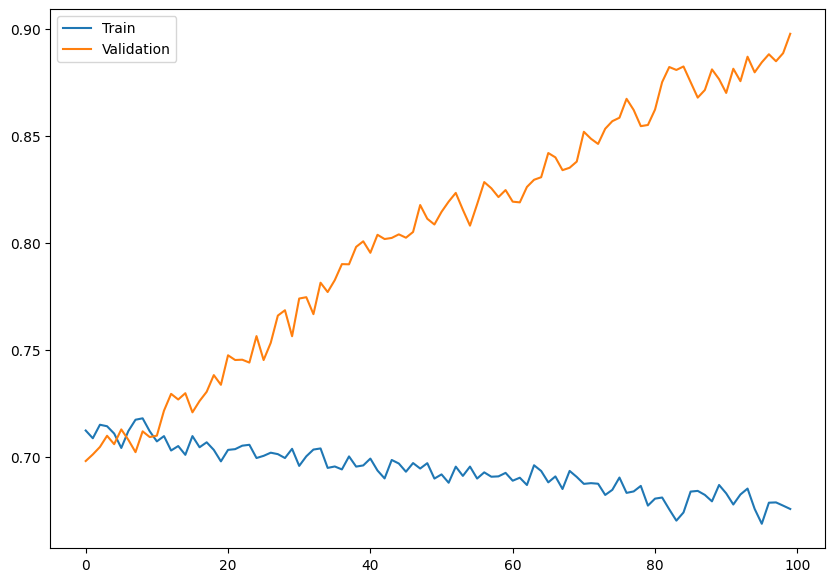

In [16]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import preprocessing
import matplotlib.pyplot as plt
#subjectnames
file_list_num = np.arange(len(newsubjectname))
file_list_numd = np.arange(len(subjectnamesd))

kf = KFold(n_splits=12)
torch.manual_seed(42)
torch.cuda.manual_seed(42)
modellist = []
modelid = 1
#file_list_num
#for i, (train_index, test_index) in enumerate(kf.split(file_list_num)):
#for train_index in file_list_num:
train_index = file_list_numd
test_index = file_list_num
print(f"Fold {i}:")
print(f"  Train: index={train_index}")
print(f"  Test:  index={test_index}")
net = Net()
net.to(device)
optimizer = optim.Adam(net.parameters(), lr=0.000001)
epochs = 100
batch_sz = 20
train_loss_epoch = []
val_loss_epoch = []
for epoch in range(epochs):
  train_loss = []
  for tr in train_index:
    v = data_de1[subjectnamesd[tr]]
    l = data_del[subjectnamesd[tr]]
    #print(v[0].shape)
    net.train()
    for i in range(0,len(v),batch_sz):
      #print(v[i].shape)
      #for j in range(0,v[i].shape[0],batch_sz):
      #print(newsubjectname[tr])
      optimizer.zero_grad()
      outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
      #print("Expout {}",outputs.shape)
      #print("Actual {}",l[i:i+batch_sz].shape)
      #print(l[i].shape)
      loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
      loss.backward()
      train_loss.append(loss)
      optimizer.step()
  print(f'Epoch {epoch + 1}/{epochs}, Train Loss: {loss.item()}')
  train_loss_epoch.append(torch.stack(train_loss).mean().cpu().detach().numpy())
  #print(train_loss_epoch)
  batch_sz = 20
  expectedoutputamigos = []
  actualoutputamigos = []

  for tr in test_index:
      net.eval()

      v = data_c1d[newsubjectname[tr]]
      l = data_c2[newsubjectname[tr]]
      net.eval()
      val_loss = []
      with torch.no_grad():
          for i in range(0,len(v),batch_sz):
            #print(v[i].shape)
            #for j in range(0,v[i].shape[0],batch_sz):
            optimizer.zero_grad()
            outputs = net(torch.tensor(v[i:i+batch_sz]).to(device, dtype=torch.float))
            #print(outputs.shape)
            #print(l[i:i+batch_sz].shape)
            loss = criterion(outputs, l[i:i+batch_sz].to(device, dtype=torch.float))
            val_loss.append(loss)
            actualoutputamigos.append(torch.round(outputs.cpu()))
            expectedoutputamigos.append(l[i:i+batch_sz])
            #actualoutput.append(torch.argmax(torch.softmax(outputs.cpu(),dim=1),dim=1))
            #expectedoutput.append(torch.argmax(l[i:i+batch_sz],dim=1).numpy())
  val_loss_mean = torch.stack(val_loss).mean().cpu().detach().numpy()
  val_loss_epoch.append(val_loss_mean)
  expectedoutputamigos = np.concatenate( expectedoutputamigos, axis=0 )
  actualoutputamigos = np.concatenate( actualoutputamigos, axis=0 )
  #print(expectedoutput.shape)
  #print(actualoutput.shape)
  print(classification_report(expectedoutputamigos,actualoutputamigos))
  print(confusion_matrix(expectedoutputamigos,actualoutputamigos))
  print(f'Validation Loss for {newsubjectname[tr]} = {val_loss_mean}')
plt.figure(figsize=(10,7))
#print(len(train_loss_epoch))
plt.plot(np.arange(epochs),train_loss_epoch,label='Train')
plt.plot(np.arange(epochs),val_loss_epoch,label='Validation')
plt.legend()